*MACHINE LEARNING LAB ASSIGNMENT*

*Write a program to implement k-nearest Neighbour for classification *



Import Libraries

In [ ]:
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Distance calculation Functions

In [ ]:
def euclidean_dist(a,b):
  dim1=len(a)
  dim2=len(b)
  if dim1!=dim2:
    print("Incorrect Dimensions: Dimensions of the 2 lists do not match")
  else:
    sum=0
    for i in range(dim1):
      sum=sum+(a[i]-b[i])**2
    result=sqrt(sum)
    return result

def manhattan_dist(a,b):
  dim1=len(a)
  dim2=len(b)
  if dim1!=dim2:
    print("Incorrect Dimensions: Dimensions of the 2 lists do not match")
  else:
    sum=0
    for i in range(dim1):
      sum=sum+abs(a[i]-b[i])
    result=sqrt(sum)
    return result

In [ ]:
def KNNClassifier(train_data,y_train,test_data,k):
  data={}
  ans=[]
  train_data=train_data.reset_index(drop=True)
  test_data=test_data.reset_index(drop=True)
  y_train=y_train.reset_index(drop=True)
  for j in range(0,len(test_data)):
    for i in range(0,len(train_data)):
      data[i]=euclidean_dist(train_data.loc[i],test_data.loc[j])
    sorted_res=dict(sorted(data.items(), key=lambda item: item[1]))
    result=[x for x in sorted_res]
    result=result[0:k]
    dict2={}
    for val in result:
      if y_train[val] not in dict2:
        dict2[y_train[val]]=1
      else:
        dict2[y_train[val]]+=1
    ans.append(max(dict2,key=dict2.get))
  return ans

Load Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# Read the DataFrame, first using the feature data
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df1=pd.DataFrame(cancer['target'],columns=['target'])
df=pd.concat([df,df1],axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Train Test Data Split

In [ ]:
cancerdf = df
X=cancerdf.drop(['target'],axis=1)
y=cancerdf['target']

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, y_train, y_test=train_test_split(X,y,random_state=0)

KNN Prediction(Classification)

In [ ]:
y_pred=KNNClassifier(train_data,y_train,test_data,5)
print(y_pred)

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]


Evaluation

In [ ]:
from sklearn.metrics import classification_report
cf_report=classification_report(y_test, y_pred)
print(cf_report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [ ]:
def get_precision(test,pred,x):
  tp=0
  fp=0
  i=0
  for item in test:
    if item==x and pred[i]==x:
      tp+=1
    if item!=x and pred[i]==x:
      fp+=1
    i+=1
  return tp/(tp+fp)

def get_recall(test,pred,x):
  tp=0
  fn=0
  i=0
  for item in test:
    if item==x and pred[i]==x:
      tp+=1
    if item==x and pred[i]!=x:
      fn+=1
    i+=1
  return tp/(tp+fn)

print("Precision-1: ",get_precision(y_test,y_pred,1))
print("Precision-0: ",get_precision(y_test,y_pred,0))
print("Recall-1: ",get_recall(y_test,y_pred,1))
print("Recall-0: ",get_recall(y_test,y_pred,0))


Precision-1:  0.9550561797752809
Precision-0:  0.9074074074074074
Recall-1:  0.9444444444444444
Recall-0:  0.9245283018867925


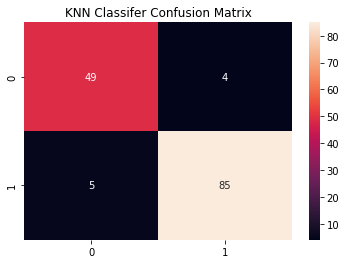

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True,ax=ax)
ax.set_title('KNN Classifer Confusion Matrix')
plt.show()

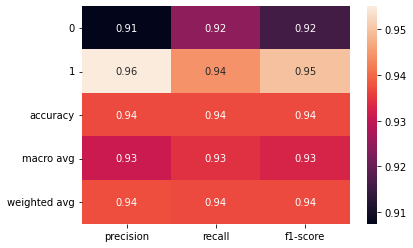

In [ ]:
cf_report=classification_report(y_test, y_pred,output_dict=True)
sns.heatmap(pd.DataFrame(cf_report).iloc[:-1, :].T, annot=True)

In [ ]:
#Using KNN Classifier function API of Sklearn Library
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(train_data, y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = knn1.predict(test_data)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

